In [ ]:
!pip install geopandas
!pip install osmnx
!pip install geemap
!pip install earthengine-api --upgrade
!pip install descartes 
!pip install numpy
!pip install rasterio
!pip install -U pip
!pip install ipython
!pip install rasterstats
!pip install geetools
!pip install -U pip
!pip install ipython
!pip install geehydro
!pip install folium


     |████████████████████████████████| 972kB 3.5MB/s 
     |████████████████████████████████| 14.7MB 230kB/s 
     |████████████████████████████████| 10.9MB 37.2MB/s 
     |████████████████████████████████| 92kB 338kB/s 
     |████████████████████████████████| 71kB 4.2MB/s 
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.
     |████████████████████████████████| 389kB 3.4MB/s 
     |████████████████████████████████| 4.7MB 11.1MB/s 
     |████████████████████████████████| 102kB 8.9MB/s 
     |████████████████████████████████| 102kB 8.5MB/s 
     |████████████████████████████████| 5.1MB 42.4MB/s 
     |████████████████████████████████| 1.1MB 32.1MB/s 
     |████████████████████████████████| 81kB 7.3MB/s 
     |████████████████████████████████| 225kB 35.6MB/s 
     |████████████████████████████████| 122kB 46.2MB/s 
  Created wheel for geemap: filename=geemap-0.7.9-py2.py3-none-any.whl size=367642 sha256=89c6701f2f7388eb7dca014

     |████████████████████████████████| 18.2MB 1.3MB/s 
     |████████████████████████████████| 1.5MB 3.5MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 127 kB 5.3 MB/s 
     |████████████████████████████████| 63 kB 906 kB/s 
  Created wheel for geetools: filename=geetools-0.6.0-py3-none-any.whl size=81648 sha256=c18b1593e9f4f9589e98bac17370319e82519c4d3ee01b83ee4487fc72154906
  Stored in directory: /root/.cache/pip/wheels/65/fe/ab/009db1b1a4a6b2118b68c0645b710306c9b46a300e547ba0cc
Successfully built geetools
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.1.1)
  Created wheel for geehydro: filename=geehydro-0.2.0-py2.py3-none-any.whl size=10113 sha256=065a18be6ecdd11ba3259ba908e024b1659ad2f3a1acc339fd7e8e356eaecb66
  Stored in directory: /root/.cache/pip/wheels/f3/22/18/5acbf2c6d1569f188c37e716641e8e8edea8009c1fbe2dd9ff
Successfully built gee

In [ ]:
import ee
import geopandas as gpd
import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterstats import zonal_stats
import numpy as np
import os
%matplotlib inline
import geetools
import geemap 
import ee
import geehydro
import folium
import fiona

In [ ]:
# Trigger the authentication flow.
ee.Authenticate()

# Initialize the library.
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=rkAW66B1Vr0ZRvNhJoDi-Ui7xt3hG_7gkuhZLeAVqhg&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/2QHYy12rqZ-ukcdC3eGBXpHnbI6culxoKV5arWDmq3AO26Shgw8gG10

Successfully saved authorization token.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


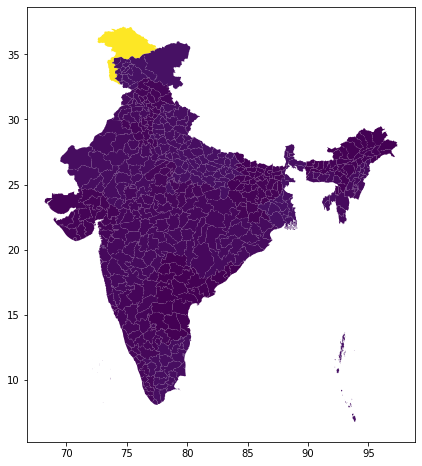

In [ ]:
#india= gpd.read_file('/content/drive/My Drive/DISTRICT91.shp')
india=gpd.read_file('/content/drive/My Drive/DISTRICT91.shp')
india.head()
india.plot(column='DIST91_ID', figsize=(16,8))



In [ ]:
# ## Define an ImageCollection
ntl = ee.ImageCollection("NOAA/DMSP-OLS/NIGHTTIME_LIGHTS").select('stable_lights')
nl2001 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152001').select('stable_lights')
nl2012 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182012').select('stable_lights')

In [ ]:
#downloaded file using url
import requests


url = 'https://ngdc.noaa.gov/eog/data/web_data/v4composites/F121999.v4.tar'
r = requests.get(url, allow_redirects=True)

open('12199', 'wb').write(r.content)


342077440

In [ ]:
#extracted file 12199 and selected F121999.v4b_web.stable_lights.avg_vis.tif.gz
import tarfile
my_tar= tarfile.open('12199')
my_tar.extract('F121999.v4b_web.stable_lights.avg_vis.tif.gz','/content/drive/My Drive')
my_tar.close
!ls

12199  drive  sample_data


In [ ]:
import tarfile
my_tar= tarfile.open('/content/drive/My Drive/F121999.v4b_web.stable_lights.avg_vis.tif.gz')
my_tar.extract('F121999.v4b_web.stable_lights.avg_vis.tif','/content/drive/My Drive')
my_tar.close
!ls

ReadError: ignored

In [ ]:
#further extracted gzip file to open F121999.v4b_web.stable_lights.avg_vis.tif file
import gzip

input = gzip.GzipFile("/content/drive/My Drive/F121999.v4b_web.stable_lights.avg_vis.tif.gz", 'rb')
s = input.read()
input.close()

output = open("F121999.v4b_web.stable_lights.avg_vis.tif", 'wb')
output.write(s)
output.close()

print("done")

done


In [ ]:
import os
os.getcwd()

In [ ]:
sicily=gpd.read_file('/content/drive/My Drive/gadm36_ITA_1.shp')
sicily.head()
sicily.plot(column='NAME_1', figsize=(16,8))

In [ ]:
import rasterio.mask

import fiona
import matplotlib

In [ ]:
with fiona.open('/content/drive/My Drive/gadm36_ITA_1.shp', "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [ ]:
with rio.open('/content/F121999.v4b_web.stable_lights.avg_vis.tif') as src:
    out_image, out_transform = rio.mask.mask(src, sicily, crop=True)
    out_meta = src.meta

In [ ]:


dataset = rio.open('/content/F121999.v4b_web.stable_lights.avg_vis.tif')

with fiona.open("/content/drive/My Drive/gadm36_ITA_1.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
sicily = [{
    'type': 'Polygon', 'coordinates': [[(37.758730,12.478929), (38.265655,15.628419), (36.660670,15.094238), (38.222294,13.314370)]]}]

out = rasterio.mask.raster_geometry_mask(dataset, sicily, crop=True)
all_bounds = [rasterio.features.bounds(sicily)]

AttributeError: ignored